# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
# Carregando a Base de Dados

demo = pd.read_csv('demo01_edit.csv')
demo.head(5)

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,3,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,4,1,0,1,0,27.482192,4.024658,1,0,1,...,1,1,0,0,0,1,0,0,0,0


In [7]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6770 non-null   int64  
 1   sexo                                    6770 non-null   int64  
 2   posse_de_veiculo                        6770 non-null   int64  
 3   posse_de_imovel                         6770 non-null   int64  
 4   qtd_filhos                              6770 non-null   int64  
 5   idade                                   6770 non-null   float64
 6   tempo_emprego                           6770 non-null   float64
 7   possui_celular                          6770 non-null   int64  
 8   possui_fone_comercial                   6770 non-null   int64  
 9   possui_fone                             6770 non-null   int64  
 10  possui_email                            6770 non-null   int6

In [11]:
y = demo.mau
X = demo.drop('mau', axis=1)

In [12]:
# Separar 70% da base para treinamento e 30% para validação. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [15]:
# Definir um objeto com a função da árvore de decisão vista em aula

clf = DecisionTreeClassifier(random_state=100)

In [16]:
# Treinar o modelo

clf = clf.fit(X_train,y_train)

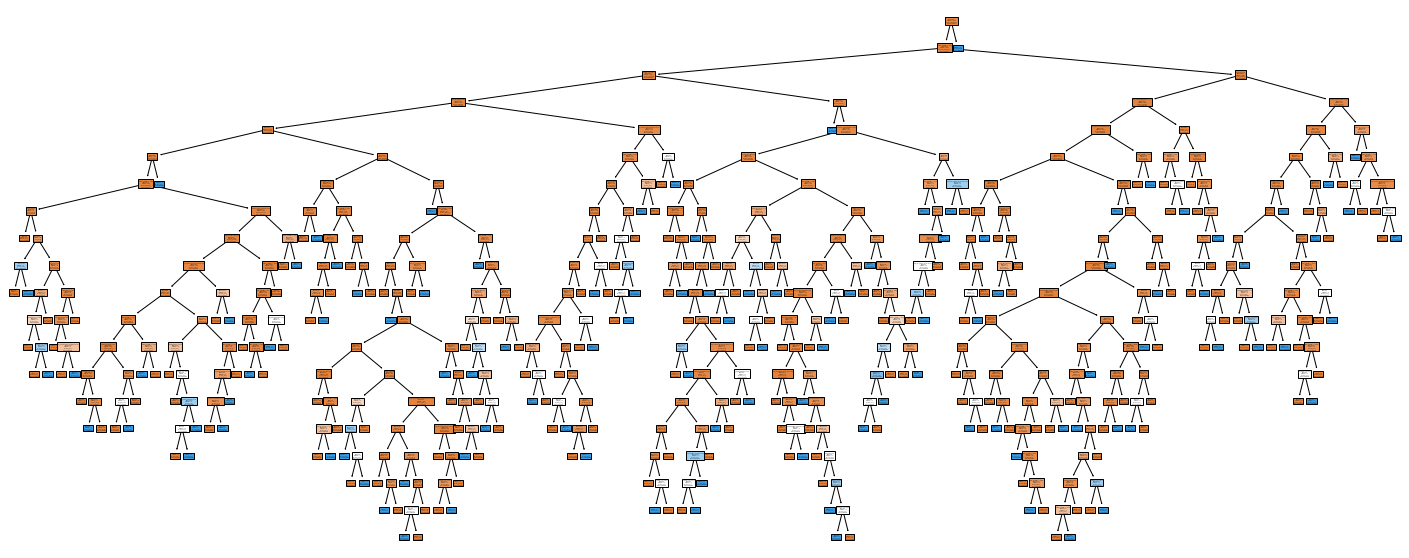

In [18]:
# Visualizar a árvore

plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns);

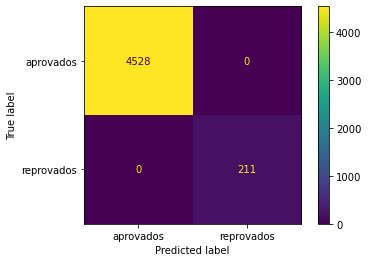

In [20]:
# Produzir uma visualização da matriz de confusão

plot_confusion_matrix(clf, X_train,y_train, display_labels=['aprovados', 'reprovados']);

In [21]:
# Calcular a acurácia na base de treinamento

predict = clf_dt.predict(X_train)
accuracy_score(y_train, predict)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [22]:
# Classificar a base de teste

clf = DecisionTreeClassifier(random_state=100)
clf_test = clf.fit(X_test,y_test)

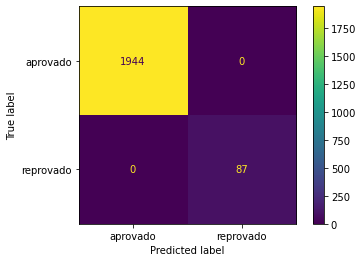

In [24]:
# Produzir a visualização da matriz de confusão

plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovado', 'reprovado'])

In [25]:
# Calcular a acurácia da base de teste

predict = clf.predict(X_test)
accuracy_score(y_test, predict)

1.0

Ambas as acurácias deram 100%, evento raro envolvendo dados, porém conclui-se que a árvore gerada pela base de treinamento reflete perfeitamente o conjunto completo de dados.

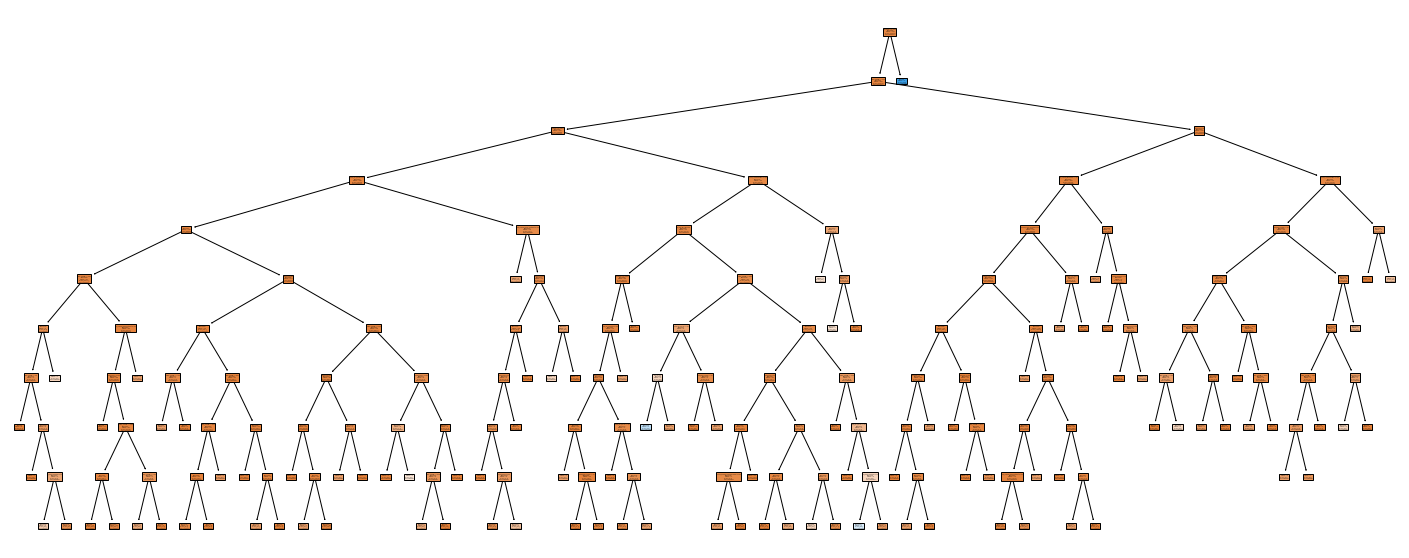

In [27]:
# Treinar uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10.

clf_a = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_b = clf_a.fit(X_train,y_train)

plt.figure(figsize=(25, 10))
plot_tree(clf_b,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns);

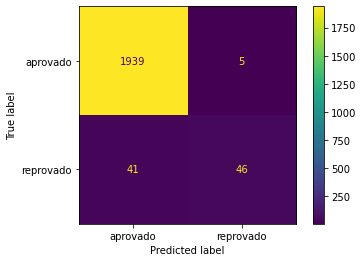

In [28]:
# Avaliar a matriz de classificação.

plot_confusion_matrix(clf_b, X_test, y_test, display_labels=['aprovado', 'reprovado'])

In [29]:
# Calcular a acurácia na base de treinamento

predict_a = clf_b.predict(X_test)
accuracy_score(y_test, predict_a)

0.9773510585918267

In [ ]:
# Alguns calculos para a proporção de proponentes que foram classificados como 'maus'

In [30]:
# Porcentagem de classificados como 'maus' na primeira arvore

mau_ar_a = 87/(1944 + 87)
mau_ar_a

0.04283604135893648

In [33]:
# Porcentagem de classificados como 'maus' na segunda arvore

mau_ar_b = (46 + 5)/(1939 + 5 + 41 + 46)
mau_ar_b

0.025110782865583457

A porcentagem da matriz de classificação caiu de 100% antes da poda para 97,73% para depois da poda. Antes da poda 4,28% dos proponentes foram classificados como 'maus', após a poda essa porcentagem caiu para 2,51% (mesmo que alguns foram classificados erroneamente).

In [34]:
# Como ficaria a acurácia se você classificasse todos os contratos como 'bons'

acc = 1944/(1944 + 87)
acc

0.9571639586410635